In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from chart import show, show_collection

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

### Spatial filtering

object type: <class 'numpy.ndarray'>
pixel type: uint8
dims: (303, 384)
size: 116352 bytes


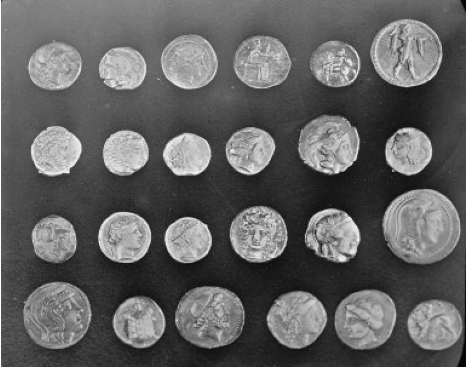

In [11]:
# Load an example image
image = data.coins()
show(image, cmap="gray", scale=0.2)
print(f"object type: {type(image)}")
print(f"pixel type: {image.dtype}")
print(f"dims: {image.shape}")
print(f"size: {image.size * image.itemsize} bytes")

#### Mean filter using scipy

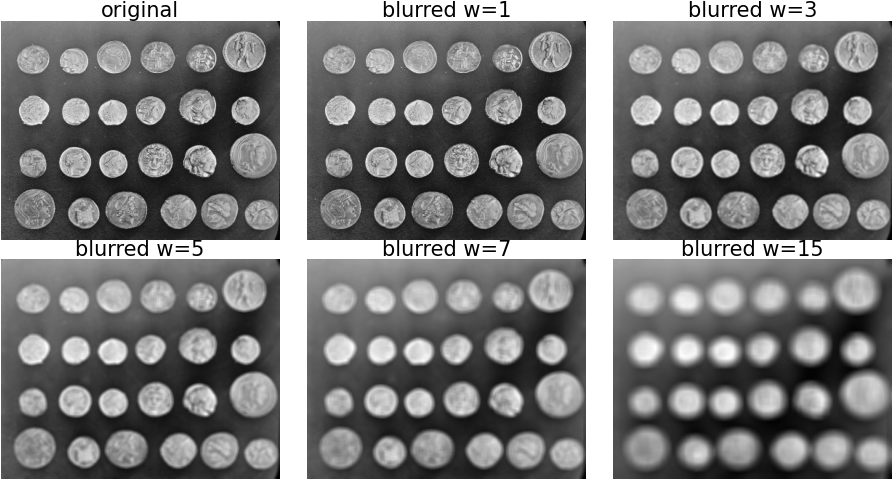

In [22]:
from scipy.ndimage import uniform_filter

kernel_sizes = [1, 3, 5, 7, 15]
blurred = [uniform_filter(image, size=kernel_size) for kernel_size in kernel_sizes]
show_collection(
    [image] + blurred,
    titles=["original"] + [f"blurred w={kernel_size}" for kernel_size in kernel_sizes],
    scale=0.08, cmap="gray", fontsize=15, num_cols=3
)

#### Arbitrary convolution using scipy

#### Mean and gaussian filtetring

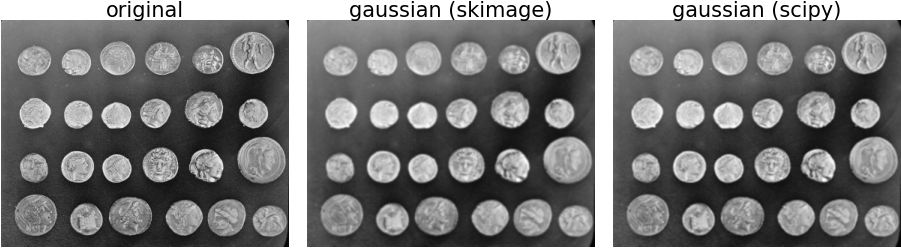

In [32]:
from scipy.ndimage import gaussian_filter
from skimage.filters import rank, gaussian

kernel_size = 3
sigma = 1.0

# mean filter
kernel = np.ones((kernel_size, kernel_size))
blurred_mean = rank.mean(image, kernel)

# guassian is a wrapper around scipy.ndimage.gaussian_filter(). kernel size is determined based on sigma.
blurred_gauss_skimage = gaussian(image, sigma=sigma)

# kernel size can be explicitly set.
blurred_gauss_scipy = gaussian_filter(image, sigma=sigma, radius=((kernel_size - 1)//2))

show_collection(
    [image, blurred_gauss_skimage, blurred_gauss_scipy],
    titles=["original", "gaussian (skimage)", "gaussian (scipy)"],
    scale=0.08, cmap="gray", fontsize=15
)


#### Median filtering

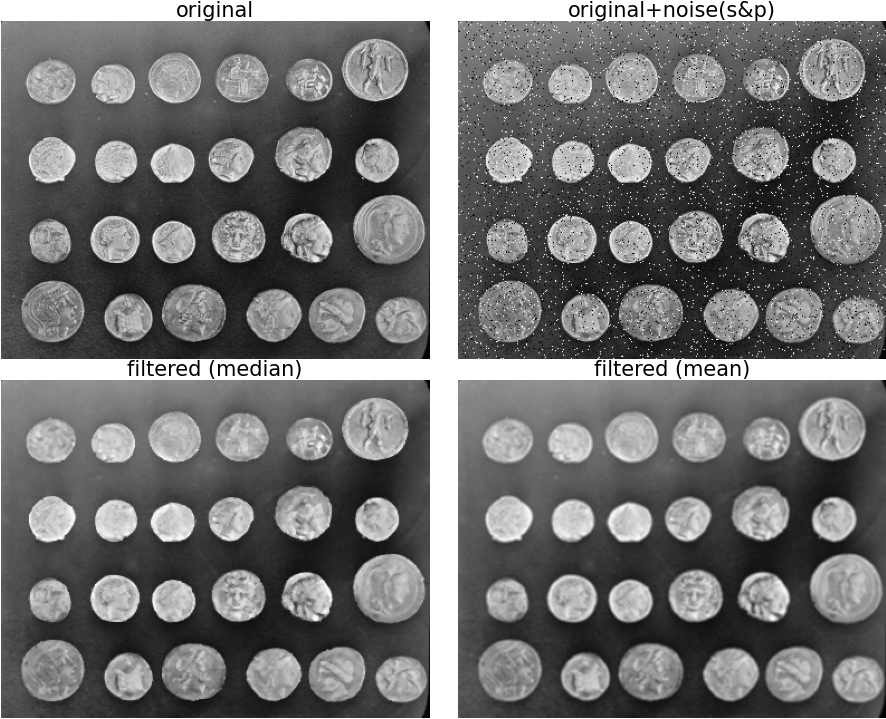

In [47]:
from skimage.util import random_noise
from scipy.ndimage import median_filter

# add salt and pepper noise to the image
# https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise
noisy = random_noise(image, mode='s&p', amount=0.05)  # Adjust the amount as needed

# apply median filter
filtered_median = median_filter(noisy_image, size=3)  # Adjust the kernel size as needed
filtered_mean = rank.mean(image, kernel)

show_collection(
    [image, noisy, filtered_median, filtered_mean],
    titles=["original", "original+noise(s&p)", "filtered (median)", "filtered (mean)"], 
    scale=0.12, cmap="gray", fontsize=15, num_rows=2
)

#### Unsharp masking

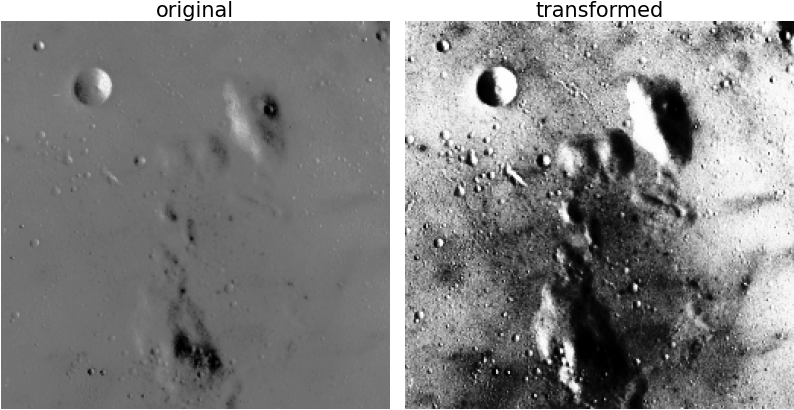

### A scikit-image example


Ref.: https://scikit-image.org/docs/stable/auto_examples/filters/plot_rank_mean.html#sphx-glr-auto-examples-filters-plot-rank-mean-py

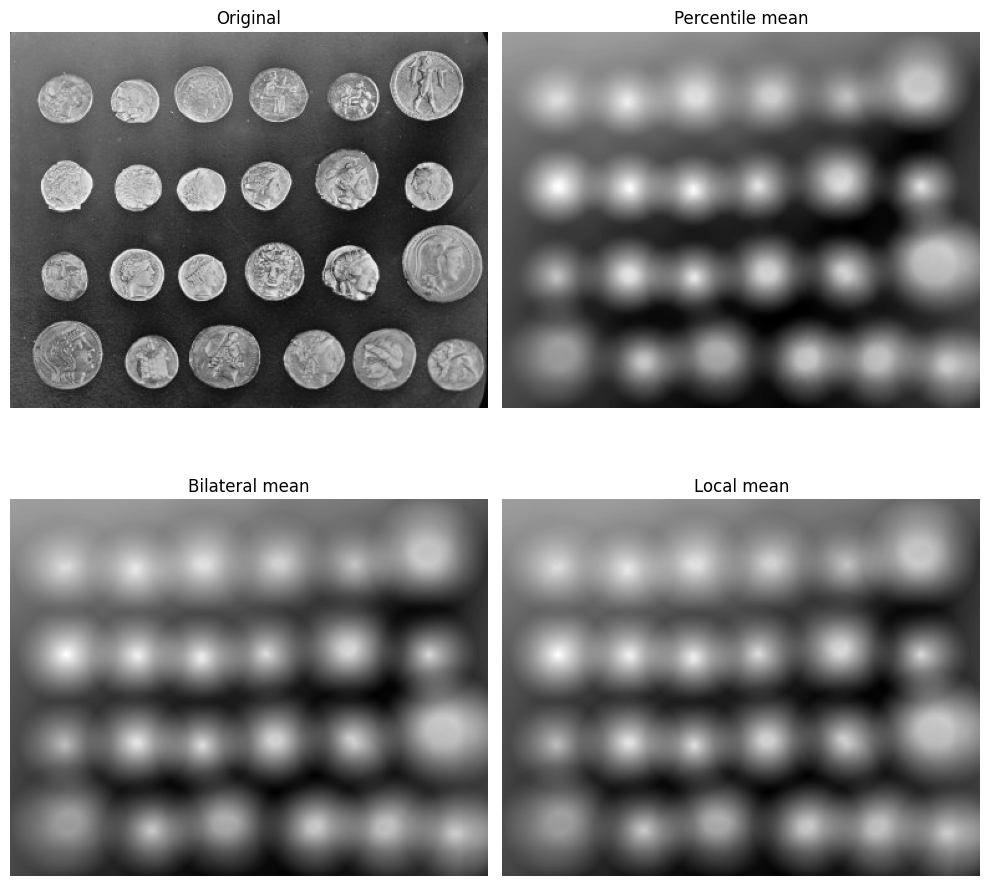

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters import rank


image = data.coins()
footprint = disk(20)

percentile_result = rank.mean_percentile(
    image, footprint=footprint, p0=.1, p1=.9
)
bilateral_result = rank.mean_bilateral(
    image, footprint=footprint, s0=500, s1=500
)
normal_result = rank.mean(image, footprint=footprint)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()